#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
#STAGE-1
#Loading playtennis dataset
df_tennis = pd.read_csv('PlayTennis.csv')
df_tennis.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
df_tennis.shape

(14, 5)

In [4]:
df_tennis.isna().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

In [5]:
df_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook        14 non-null object
Temperature    14 non-null object
Humidity       14 non-null object
Wind           14 non-null object
Play Tennis    14 non-null object
dtypes: object(5)
memory usage: 688.0+ bytes


In [6]:
df_tennis.describe()

,Outlook,Temperature,Humidity,Wind,Play Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,Normal,Weak,Yes
freq,5,6,7,8,9


When dataset is very less use point estimate 

In [8]:
#STAGE 2

#perform encoding
#Split X and y

df_tennis['Outlook'] = df_tennis['Outlook'].replace({'Sunny':0,'Overcast':1,'Rain':2})
df_tennis['Temperature'] = df_tennis['Temperature'].replace({'Hot':0,'Mild':1,'Cool':2})
df_tennis['Humidity'] = df_tennis['Humidity'].replace({'High':0,'Normal':1})
df_tennis['Wind'] = df_tennis['Wind'].replace({'Weak':0,'Strong':1})
df_tennis['Play Tennis'] = df_tennis['Play Tennis'].replace({'Yes':0,'No':1})

In [13]:
y = df_tennis['Play Tennis']
X = df_tennis.drop('Play Tennis',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
#STAGE 3

#Use simple KNN model
#Display confusion matrix and classificatiion report

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)

In [16]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Avish\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pima Indian Diabetes

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#STAGE-1
#Loading pima
#null,info,describe

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']

df = pd.read_csv('pima-indians-diabetes.data',names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.shape

(768, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
#EDA
#Pairplot
# sns.pairplot(data=df,hue='label',diag_kind='kde')
# plt.show()


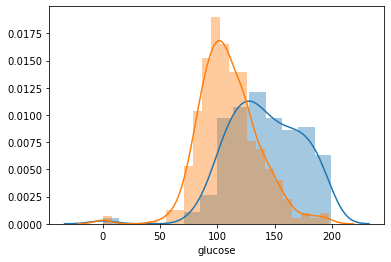

In [30]:
glu_1 = df[df['label']==1]['glucose']
glu_0 = df[df['label']==0]['glucose']

sns.distplot(glu_1)
sns.distplot(glu_0)

### P-VALUE Approach for feature elimination/selection(Statistical Analysis)
- For binary use 2 sample ttest
- For multi use One way Annova test

#TWO sample ttest
H0:POPULATION1 = POPULATION2 >0.05
H1:POP1 = POP2 <0.05

In [31]:
from scipy.stats import ttest_ind

In [32]:
# 2 SAMPLE TTEST FOR GLUCOSE
ttest_ind(glu_0,glu_1)

#p values very close to 0,so less than 0.05 so we will go with H1(Alternative),so glucose is important,we won't drop it

Ttest_indResult(statistic=-14.600060005973894, pvalue=8.935431645289913e-43)

In [33]:
#2 SAMPLE TTEST FOR BP

bp_1 = df[df['label']==1]['bp']
bp_0 = df[df['label']==0]['bp']

ttest_ind(bp_0,bp_1)

#p values greater than 0.05,so we will go with H0(Alternative),so bp is not important,we can drop it

Ttest_indResult(statistic=-1.8047023017353887, pvalue=0.07151390009776082)

In [34]:
#2 SAMPLE TTEST FOR SKIN

skin_1 = df[df['label']==1]['skin']
skin_0 = df[df['label']==0]['skin']

ttest_ind(skin_0,skin_1)

#p values less than 0.05,so less than 0.05 so we will go with H1(Alternative),so skin is important,we won't drop it

Ttest_indResult(statistic=-2.0747001964159613, pvalue=0.03834770482049123)

- We can see that if for skin(0.075),test is passing it means above that everthing would pass for example skin so need to go further

In [35]:
#2 SAMPLE TTEST FOR SKIN

insulin_1 = df[df['label']==1]['insulin']
insulin_0 = df[df['label']==0]['insulin']

ttest_ind(insulin_0,insulin_1)

#p values less than 0.05, so we will go with H1(Alternative),so skin is important,we won't drop it

Ttest_indResult(statistic=-3.64432538765356, pvalue=0.00028618646036031987)

In [36]:
#2 SAMPLE TTEST FOR pedigree

pedigree_1 = df[df['label']==1]['pedigree']
pedigree_0 = df[df['label']==0]['pedigree']

ttest_ind(pedigree_0,pedigree_1)

#p values less than 0.05, so we will go with H1(Alternative),so pedigree is important,we won't drop it

Ttest_indResult(statistic=-4.88582646072744, pvalue=1.254607010148809e-06)

In [37]:
#2 SAMPLE TTEST FOR pregnant

pregnant_1 = df[df['label']==1]['pregnant']
pregnant_0 = df[df['label']==0]['pregnant']

ttest_ind(pregnant_0,pregnant_1)

#p values less than 0.05, so we will go with H1(Alternative),so pregnant is important,we won't drop it

Ttest_indResult(statistic=-6.298430550035151, pvalue=5.065127298053476e-10)

In [38]:
#2 SAMPLE TTEST FOR bmi

bmi_1 = df[df['label']==1]['bmi']
bmi_0 = df[df['label']==0]['bmi']

ttest_ind(bmi_0,bmi_1)

#p values less than 0.05, so we will go with H1(Alternative),so bmi is important,we won't drop it

Ttest_indResult(statistic=-8.471839947865249, pvalue=1.2298074873116022e-16)

In [39]:
#2 SAMPLE TTEST FOR age

age_1 = df[df['label']==1]['age']
age_0 = df[df['label']==0]['age']

ttest_ind(age_0,age_1)

#p values less than 0.05, so we will go with H1(Alternative),so age is important,we won't drop it

Ttest_indResult(statistic=-6.792688071649956, pvalue=2.2099754606654358e-11)

In [40]:
# TWO SAMPLE TTEST USING FOR LOOP for all the columns

df_0 = df[df['label']==1]
df_1 = df[df['label']==0]

columns = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']

In [41]:
status_list=[]
for col in columns:
    p_val=ttest_ind(df_0[col],df_1[col])[1]
    if p_val<0.05:
        status_list.append([col,True])
    else:
        status_list.append([col,False])


In [42]:
status_list

[['pregnant', True],
 ['glucose', True],
 ['bp', False],
 ['skin', True],
 ['insulin', True],
 ['bmi', True],
 ['pedigree', True],
 ['age', True]]

Hence bp is not contributing in our prediction so we will drop it.

- We can also see heatmap,we can easily see values which are highly correlation but its best to do ttest because sometime seeing heatmap we may drop feature which can be important
- See the lowest(0.065) column in last row ,start with it see its pvalue,then see the second bigger(0.075) value

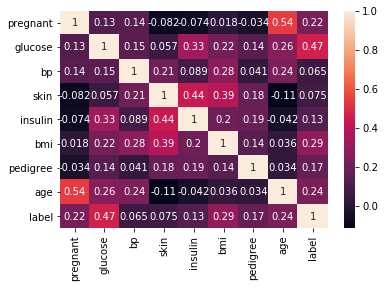

In [21]:
sns.heatmap(df.corr(),annot = True)

## Model Building of Pima Diabetes usin KNN

In [4]:
X = df.drop(columns = ['bp','label'])
y = df['label']

In [45]:
x1 = np.array([1,2,3,4,5])
(x1-np.mean(x1))/np.std(x1)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [46]:
x2 = np.array([100,200,300,400,500])
(x2-np.mean(x2))/np.std(x2)

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Above is a dummy data to show how Standard scaler works see the table in the recording of SLC HANDS ON 22 JULY

- As our data is continous we will go with Standard scaler,otherwise MINMAX

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [22]:
#Manual knn model building and KNN tuning...we can also use gridsearch

from sklearn.model_selection import cross_val_score
bias = []
var= []
model = []


for neigh in range(5,70):
    for wei in ['uniform','distance']:
        knn = KNeighborsClassifier(n_neighbors = neigh,weights = wei)  #crossvalidation
        cv = cross_val_score(knn,X_scaled,y,cv = 3,scoring = 'roc_auc')
        bias.append((1-np.mean(cv)))
        var.append(np.std(cv,ddof = 1))
        model.append((neigh,wei))

In [23]:
print(bias)

[0.2356149462727899, 0.22802078558764727, 0.2246196767603731, 0.21745428866106964, 0.2146740272444596, 0.2104078570293494, 0.2103123679089185, 0.2068301043626688, 0.20734471297766666, 0.20404175029151406, 0.20270861192645617, 0.1995955278949193, 0.20110293904617393, 0.19722982025059876, 0.20042538826202716, 0.19503300905371546, 0.1971032349812356, 0.19290532843132524, 0.19332202057987136, 0.1891672921173283, 0.19365813594897052, 0.18989200877159085, 0.1926687447570753, 0.18839893352293358, 0.1898117802570033, 0.1861476151227771, 0.18657563638722874, 0.1828000295004354, 0.18165873478439087, 0.178745702644318, 0.1831722720946507, 0.18090910443301234, 0.1836289636631555, 0.18155648377147315, 0.18293430286667312, 0.18059287168484506, 0.18414559506650396, 0.18232871456071054, 0.1832940604659249, 0.18081737342066007, 0.1818102900436811, 0.1804644355078482, 0.18256916892866204, 0.18086581075773933, 0.1816226090604166, 0.17965139768445304, 0.17974867841742326, 0.17735441605695546, 0.1786524689

In [24]:
#min bias
min(bias)

0.1738764292632191

In [25]:
#in which index the minimum value happen
np.argmin(bias)

89

In [26]:
model[28]

(19, 'uniform')

In [27]:
#Min variance
min(var)

0.008982113969095188

In [28]:
#in which index the minimum value happen
np.argmin(var)

1

In [29]:
#This is the place where variance error is very less
model[7]

(8, 'distance')

- Based on business we will decide what we have to use BIAS or VARIANCE
- We can use GRIDSEARCH but in gridsearch it will give the best result based on bias error and not variance

# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [19]:
#There is no hyperparameter required for GaussianNB

nb = GaussianNB()
cv = cross_val_score(nb,X_scaled,y,cv = 3,scoring = 'roc_auc')

#as binary classification,scoring should be roc

In [30]:
#As cv = 3

cv

array([0.81552878, 0.77857768, 0.87775012])

In [20]:
#bias error
1-np.mean(cv)

0.19068886428817988

In [21]:
#variance error
np.std(cv,ddof = 1)

0.04292867307813407